In [157]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(42)
plt.style.use('../style.mpl')

In [158]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 1139 nodes and 17908 edges


In [159]:
small_world_effect_value = nx.average_shortest_path_length(G)
print(f"Small world effect: {small_world_effect_value:.5f}")
print(f"Logarithm of the number of nodes: {np.log(len(G.nodes())):.2f}")

Small world effect: 3.02649
Logarithm of the number of nodes: 7.04


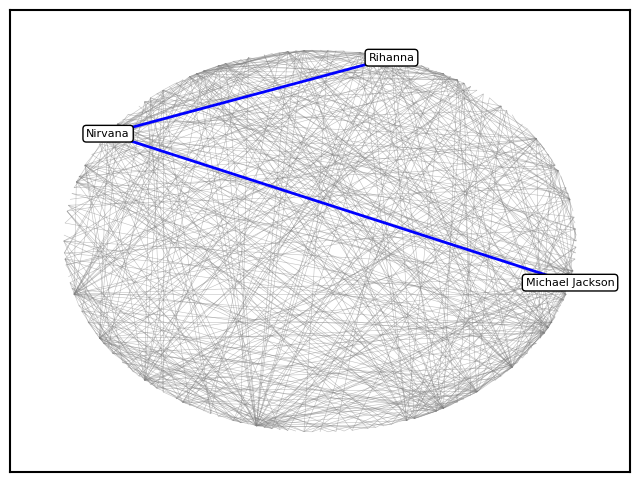

In [163]:
subgraph = G.subgraph(list(G.nodes())[:200])    

# node 1 should be Rihanna
# node 2 should be Michael Jackson
node1 = 'Rihanna'
node2 = 'Michael Jackson'
if node1 not in subgraph.nodes():
    raise ValueError(f"Node {node1} not found in the subgraph.")

if node2 not in subgraph.nodes():
    raise ValueError(f"Node {node2} not found in the subgraph.")

pos = nx.circular_layout(subgraph)
f, ax = plt.subplots(1,1)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='gray', width=0.4)

nx.draw_networkx_labels(subgraph, pos, labels={node1: node1}, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'), font_size=8)
nx.draw_networkx_labels(subgraph, pos, labels={node2: node2}, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'), font_size=8)

path = nx.shortest_path(subgraph, node1, node2)
for i in range(len(path) - 1):
    nx.draw_networkx_edges(subgraph, pos, edgelist=[(path[i], path[i + 1])], edge_color='b', width=2)

nx.draw_networkx_labels(subgraph, pos, labels={node: node for node in path if node not in [node1, node2]}, font_size=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.savefig("../plots/small-world-effect.png", transparent=True)
plt.show()

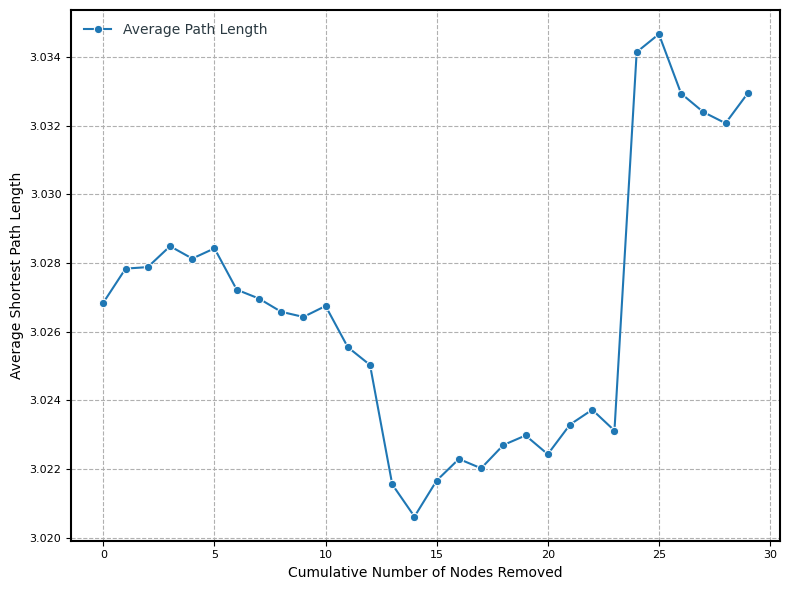

In [165]:
nodes_to_remove = np.random.choice(list(G.nodes()), size=min(30, len(G.nodes())), replace=False)

avg_shortest_path_lengths = []
for i in range(len(nodes_to_remove)):
    G_copy = G.copy()
    G_copy.remove_nodes_from(nodes_to_remove[:i+1])
    try:
        avg_length = nx.average_shortest_path_length(G_copy)
    except nx.NetworkXError:
        avg_length = float('inf')
    avg_shortest_path_lengths.append(avg_length)

plt.figure()
sns.lineplot(x=range(len(nodes_to_remove)), y=avg_shortest_path_lengths, marker='o', linestyle='-')

plt.xlabel('Cumulative Number of Nodes Removed')
plt.ylabel('Average Shortest Path Length')
plt.grid(True, linestyle='--')

plt.legend(['Average Path Length'])
plt.tight_layout()

plt.savefig("../plots/average-path-length.png", transparent=True)
plt.show()

In [ ]:
n = G.number_of_nodes()
k = int(np.mean([d for _, d in G.degree()]))

# Ensure k is even and n * k is even (required for regular graph)
if k % 2 != 0:
    k -= 1
if (n * k) % 2 != 0:
    k -= 1

G_random = nx.erdos_renyi_graph(n=n, p=k / (n - 1))
L_real = nx.average_shortest_path_length(G)
L_random = nx.average_shortest_path_length(G_random)
L_ratio = L_random / L_real

G_regular = nx.watts_strogatz_graph(n=n, k=k, p=0)
C_real = nx.average_clustering(G)
C_regular = nx.average_clustering(G_regular)
C_ratio = C_real / C_regular

w = L_ratio - C_ratio

print(f"L_ratio (L_random / L_real): {L_ratio:.4f}")
print(f"C_ratio (C_real / C_regular): {C_ratio:.4f}")
print(f"Final Measure (L_ratio - C_ratio): {w:.4f}")

L_ratio (L_random / L_real): 0.7983
C_ratio (C_real / C_regular): 1.0887
Final Measure (L_ratio - C_ratio): -0.2904


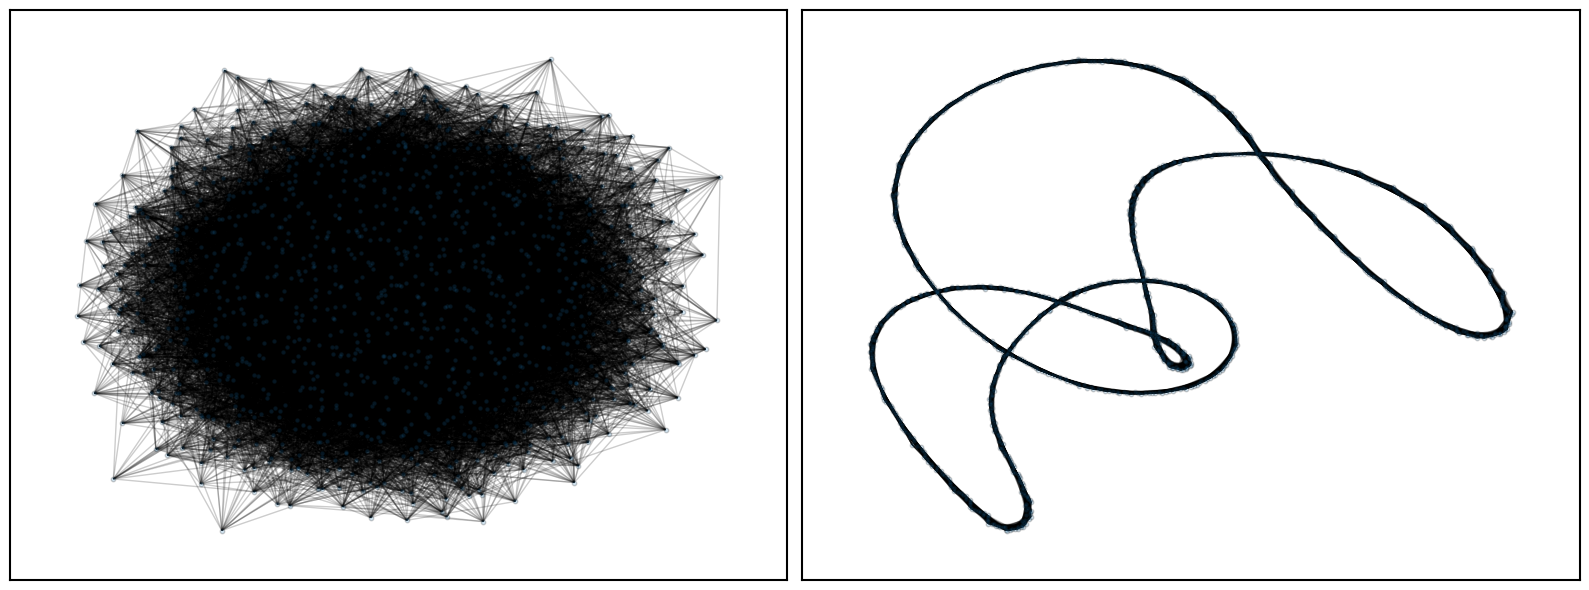

In [166]:
f, axes = plt.subplots(1,2,figsize=(16, 6))

nx.draw(G_random, node_size=10, edge_color='black', alpha=0.2, ax=axes[0], edgecolors='black')
axes[0].axis("on")

plt.subplot(1, 2, 2)
nx.draw(G_regular, node_size=10, edge_color='black', alpha=0.2, ax=axes[1], edgecolors='black')
axes[1].axis("on")

plt.tight_layout()

plt.savefig("../plots/regular-random-graph.png", transparent=True)
plt.show()